In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
account = pd.read_csv('account.csv',sep=';')
card = pd.read_csv('card.csv', sep=';')
trans = pd.read_csv('trans.csv', sep=';')
client = pd.read_csv('client.csv', sep = ';')
order = pd.read_csv('order.csv', sep = ';')
loan = pd.read_csv('loan.csv', sep = ';')
disp = pd.read_csv('disp.csv', sep = ';')
district = pd.read_csv('district.csv', sep = ';')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


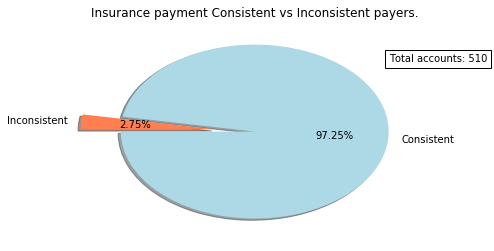

In [2]:
# Regular Insurance 
from dateutil.relativedelta import relativedelta

credit = trans['type'] == 'PRIJEM'
withdraw = trans['type'] == 'VYDAJ'
insurance = trans['k_symbol'] == "POJISTNE" 
operation = trans['operation'] == 'VKLAD'
loan_payment = trans['k_symbol'] == "UVER"
ins_accounts = trans[insurance]['account_id'].values
ins_accounts = list(set(ins_accounts))

consistent, non_conistent = 0, 0
for x in ins_accounts:
    acc_id = trans['account_id'] == x
    xin = trans[acc_id & insurance].reset_index(drop=True)
    xx1 = '19' + str(xin['date'].iloc[0])
    xx2 = '19' + str(xin['date'].iloc[-1])
    d1 = pd.to_datetime(str(xx1), format='%Y%m%d')
    d2 = pd.to_datetime(str(xx2), format='%Y%m%d')
    rdelta = relativedelta(d2,d1)
    totalX = xin.shape[0]
    diff = rdelta.months + 1 + rdelta.years * 12
    if diff != totalX:
        non_conistent += 1
    else:
        consistent += 1

# Insurance payment consistency        
values = [ consistent, non_conistent]
labels = ['Consistent', 'Inconsistent']
colors = ['lightblue', 'coral']
plt.pie( values, labels = labels, colors = colors, explode = (0,0.3),\
        shadow = True, startangle = -180, autopct = '%1.2f%%')
plt.title('Insurance payment Consistent vs Inconsistent payers.')
plt.annotate('Total accounts: '+str(len(ins_accounts)), xy=(1, 0.8),bbox=dict(facecolor='none', edgecolor='black'))
plt.show()


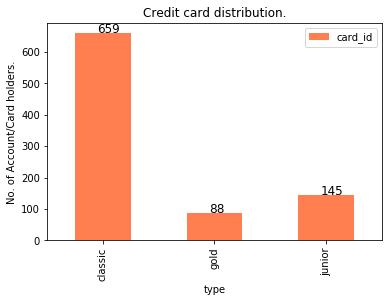

In [3]:
# Credit card distribution
xx = card.groupby('type').agg({'card_id':'count'}).plot(kind = 'bar', color = 'coral')
for i in xx.patches:
    xx.text(i.get_x() + 0.2, i.get_height() +0.2, str(i.get_height()), fontsize = 12)
plt.title('Credit card distribution.')
plt.ylabel('No. of Account/Card holders.')
plt.show()

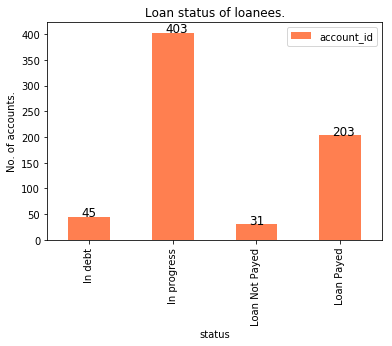

In [4]:
loan = loan.replace('A','Loan Payed')
loan = loan.replace('B','Loan Not Payed')
loan = loan.replace('C','In progress')
loan = loan.replace('D','In debt')

xx = loan.groupby('status').agg({'account_id':'count'}).plot(kind = 'bar', color='coral')
for i in xx.patches:
    xx.text(i.get_x() + 0.16, i.get_height() +0.2, str(i.get_height()), fontsize = 12)
plt.title('Loan status of loanees.')
plt.ylabel('No. of accounts.')
plt.show()

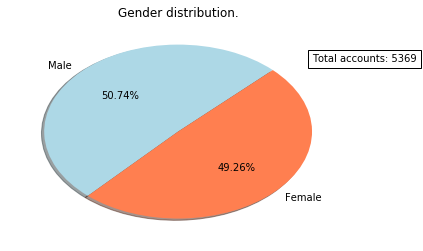

In [5]:
# Gender distribution
female, male = [], []
for i in range(client.shape[0]):
    date = int((client['birth_number'][i])%10000/100)
    if date >= 50:
        female.append(client['client_id'][i])
    else:
        male.append(client['client_id'][i])

# Visualising gender distribution
values = [ len(male), len(female)]
labels = [ 'Male', 'Female']
colors = ['lightblue', 'coral']
plt.pie(values, labels = labels, colors = colors, shadow = True,\
       autopct = '%1.2f%%', startangle = 45)
plt.title('Gender distribution.')
plt.annotate('Total accounts: '+str(client.shape[0]), xy = (1, 0.8), \
             bbox = dict(facecolor='none', edgecolor='black'))
plt.show()

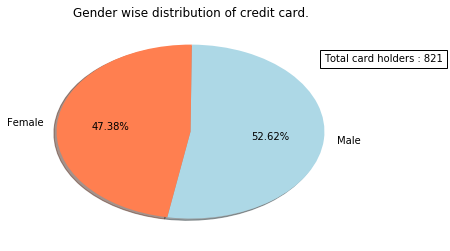

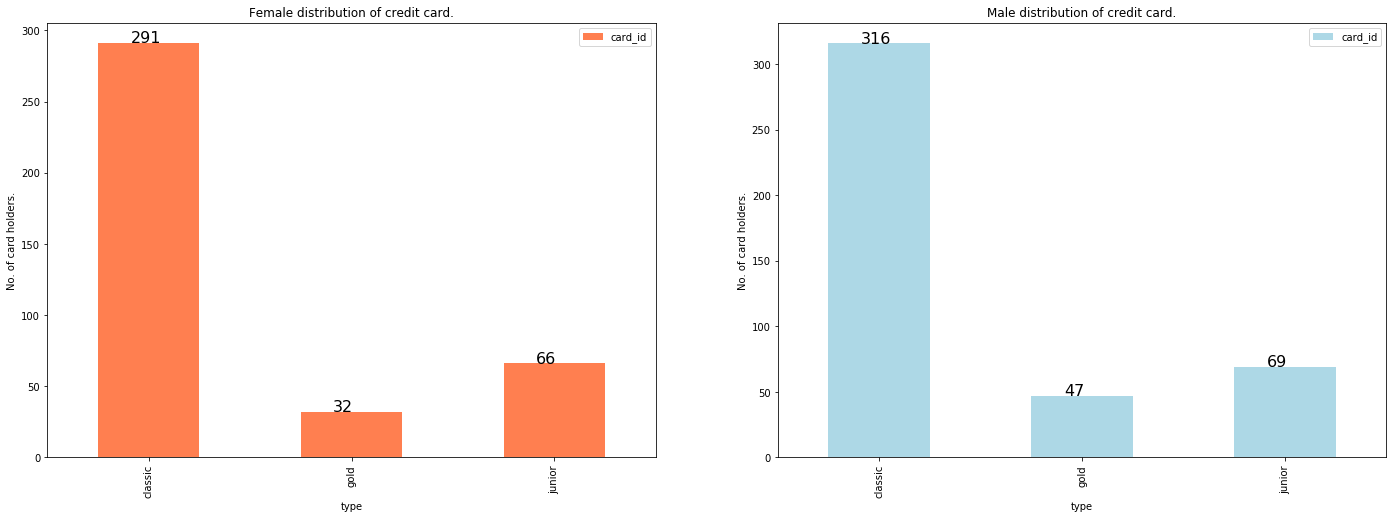

In [6]:
# Gender wise distribution of credit card
mdisp = disp[disp.isin(male)['disp_id']]['disp_id']
fdisp = disp[disp.isin(female)['disp_id']]['disp_id']
mcard = card[card['disp_id'].isin(mdisp)]
fcard = card[card['disp_id'].isin(fdisp)]

# Visualising distribution
values = [mcard.shape[0], fcard.shape[0]]
labels = ['Male', 'Female']
colors = ['lightblue', 'coral']
plt.pie(values, labels = labels, colors = colors, shadow = True,\
        autopct = '%1.2f%%', startangle = -100)
plt.title('Gender wise distribution of credit card.')
plt.annotate('Total card holders : '+str(sum(values)), xy = (1, 0.8),\
             bbox = dict(facecolor='none', edgecolor='black'))
plt.show()

# Visualisation
fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(24, 8)
plt.subplots_adjust(wspace=0.2)

# Male distribution
mx = mcard.groupby('type').agg({'card_id':'count'}).\
    plot(ax = ax2[1], title = 'Male distribution of credit card.', kind = 'bar', color = 'lightblue')
for i in mx.patches:
    mx.text(i.get_x() + 0.16, i.get_height() +0.3, str(i.get_height()), fontsize = 16)
ax2[1].set_ylabel('No. of card holders.')

# Female distribution
fx = fcard.groupby('type').agg({'card_id':'count'}).\
    plot(ax = ax2[0], title = 'Female distribution of credit card.', kind = 'bar', color = 'coral')
for i in fx.patches:
    fx.text(i.get_x() + 0.16, i.get_height() +0.3, str(i.get_height()), fontsize = 16)
ax2[0].set_ylabel('No. of card holders.')
plt.show()

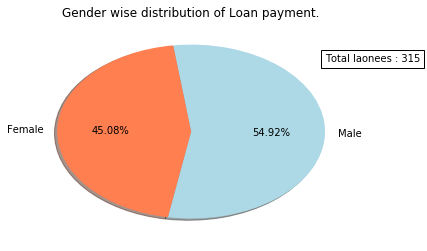

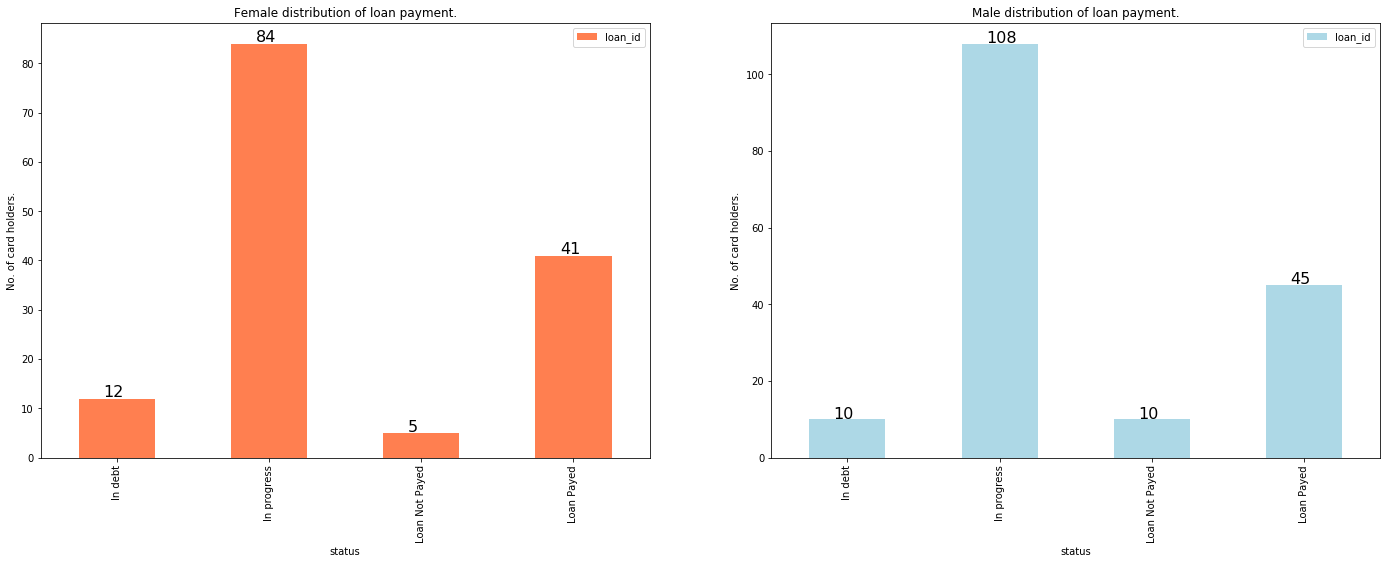

In [7]:
# Loan vs Gender
mclient = disp[disp.isin(male)['account_id']]['account_id']
fclient = disp[disp.isin(female)['account_id']]['account_id']
mloan = loan[loan['account_id'].isin(mclient)].reset_index(drop = True)
floan = loan[loan['account_id'].isin(fclient)].reset_index(drop = True)

# Visualising distribution
values = [mloan.shape[0], floan.shape[0]]
labels = ['Male', 'Female']
colors = ['lightblue', 'coral']
plt.pie(values, labels = labels, colors = colors, shadow = True,\
        autopct = '%1.2f%%', startangle = -100)
plt.title('Gender wise distribution of Loan payment.')
plt.annotate('Total laonees : '+ str(sum(values)), xy = (1, 0.8),\
             bbox = dict(facecolor='none', edgecolor='black'))
plt.show()

# Visualisation
fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(24, 8)
plt.subplots_adjust(wspace=0.2)

# Male distribution
mx = mloan.groupby('status').agg({'loan_id':'count'}).\
    plot(ax = ax2[1], title = 'Male distribution of loan payment.', kind = 'bar', color = 'lightblue')
for i in mx.patches:
    mx.text(i.get_x() + 0.16, i.get_height() +0.3, str(i.get_height()), fontsize = 16)
ax2[1].set_ylabel('No. of card holders.')

# Female distribution
fx = floan.groupby('status').agg({'loan_id':'count'}).\
    plot(ax = ax2[0], title = 'Female distribution of loan payment.', kind = 'bar', color = 'coral')
for i in fx.patches:
    fx.text(i.get_x() + 0.16, i.get_height() +0.3, str(i.get_height()), fontsize = 16)
ax2[0].set_ylabel('No. of card holders.')
plt.show()


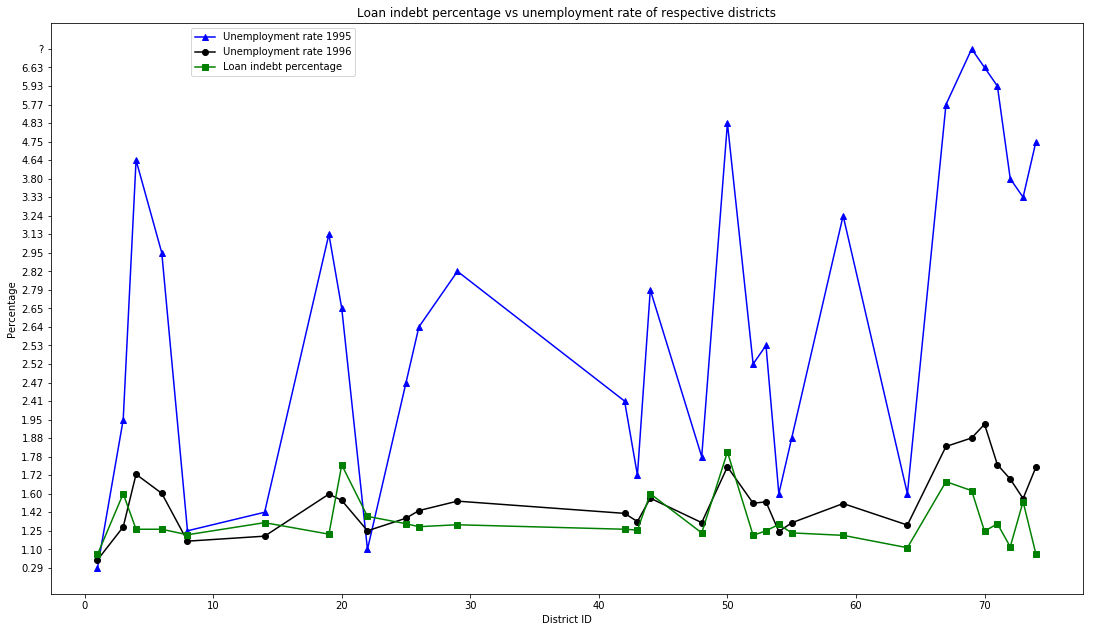

In [8]:
# Unemployment rate vs Indebt percentage of districts
# indebt accounts
accid = loan[loan['status'] == 'In debt'].reset_index()['account_id']
indebt = account[account['account_id'].isin(accid)].reset_index()[['district_id','account_id']]
indebt = indebt['district_id'].value_counts()
indebt = indebt.reset_index()
indebt = pd.DataFrame(indebt).sort_values('index').reset_index(drop = True)
indebt.columns = ['district_id', 'indebt_count']

totalacc = account.groupby('district_id').agg({'account_id':'count'})
totalacc = pd.DataFrame(totalacc).reset_index()
totalacc = totalacc[totalacc['district_id'].isin(indebt['district_id'])].reset_index(drop = True)
total = pd.merge(indebt, totalacc, on = 'district_id')
total.columns = ['district_id', 'indebt_count', 'totalcount']

# Percentage caculation
total['indebt_pct'] = (total['indebt_count']/total['totalcount']) * 100

# Unemployment rates 1995, 1996
unemploy = district[district['A1'].isin(total['district_id'])].reset_index()
plt.plot(unemploy['A1'], unemploy['A12'], label = 'Unemployment rate 1995', color ='b', marker='^')
plt.plot(unemploy['A1'], unemploy['A13'], label = 'Unemployment rate 1996', color ='k', marker='o')
plt.plot(total['district_id'], total['indebt_pct'], label = 'Loan indebt percentage', color='g', marker='s')
plt.title('Loan indebt percentage vs unemployment rate of respective districts')
plt.ylabel('Percentage')
plt.xlabel('District ID')
plt.legend(bbox_to_anchor=(0.3, 1.0))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

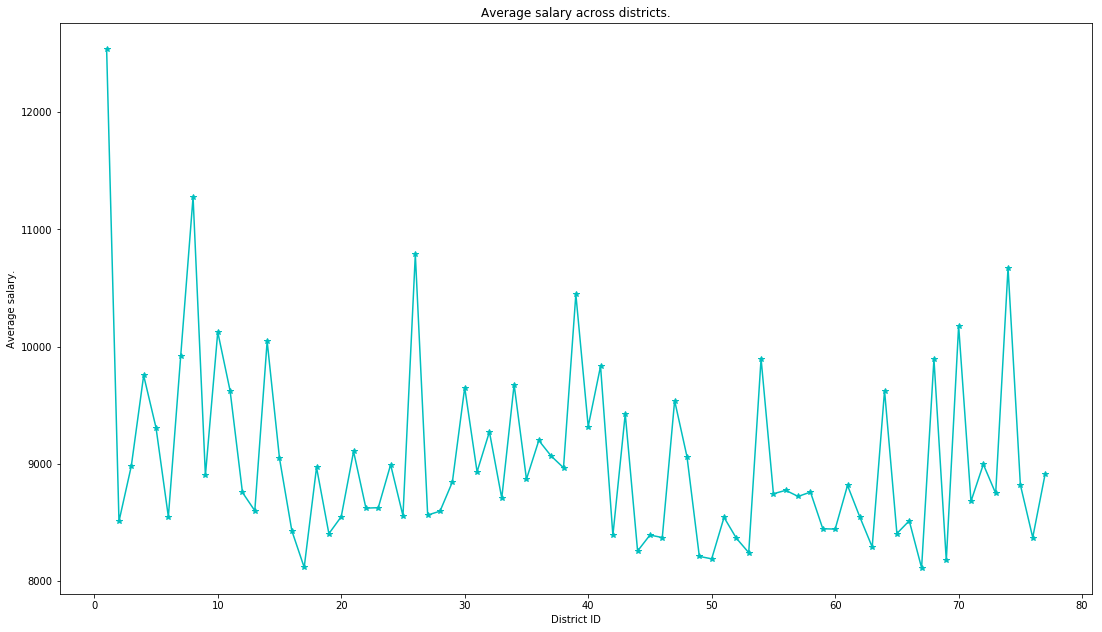

In [9]:
# Average salary across districts
plt.plot(district['A1'], district['A11'], color = 'c', marker = '*')
plt.title('Average salary across districts.')
plt.ylabel('Average salary.')
plt.xlabel('District ID')
fig2 = plt.gcf()
fig2.set_size_inches(18.5, 10.5)
plt.show()


In [10]:
loan[loan['status']=='Loan Not Payed'].shape

(31, 7)